In [1]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib 
!pip install lxml
!pip install plotly

In [2]:
!pip install yfinance
!pip install matplotlib

In [49]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [46]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="1y")
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-05-13 00:00:00-04:00,170.000000,175.399994,169.000000,171.889999,67018900,0.0,0.0
2024-05-14 00:00:00-04:00,174.500000,179.490005,174.070007,177.550003,86407400,0.0,0.0
2024-05-15 00:00:00-04:00,179.899994,180.000000,173.110001,173.990005,79663000,0.0,0.0
2024-05-16 00:00:00-04:00,174.100006,175.789993,171.429993,174.839996,59812200,0.0,0.0
2024-05-17 00:00:00-04:00,173.550003,179.630005,172.750000,177.460007,77445800,0.0,0.0


In [7]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [15]:
response = requests.get(url)
data = response.content

In [17]:
soup = BeautifulSoup(data, "html.parser")

In [18]:
tables = soup.find_all('table')
tesla_revenue_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.get_text():
        tesla_revenue_table = table
        break

In [36]:
if tesla_revenue_table:
    data = []
    for row in tesla_revenue_table.find_all("tr")[1:]:
        cols = row.find_all("td")
        if len(cols) > 1:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue:
                data.append([date, revenue])
    tesla_revenue = pd.DataFrame(data, columns=["Date", "Ingresos"])
    tesla_revenue["Ingresos"] = tesla_revenue['Ingresos'].astype(float)
    tesla_revenue.dropna(inplace=True)
    tesla_revenue = tesla_revenue[tesla_revenue['Ingresos'] != ""]
    display(tesla_revenue.tail())
else:
    print("No se encontró la tabla de 'Tesla Quarterly Revenue'.")

,Date,Ingresos
48,2010-09-30,31.0
49,2010-06-30,28.0
50,2010-03-31,21.0
51,2009-09-30,46.0
52,2009-06-30,27.0


In [45]:
gme = yf.Ticker("GME")
hist2 = gme.history(period="1y")
hist2.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-05-13 00:00:00-04:00,26.340000,38.200001,24.770000,30.450001,187241700,0.0,0.0
2024-05-14 00:00:00-04:00,64.830002,64.830002,36.000000,48.750000,206979100,0.0,0.0
2024-05-15 00:00:00-04:00,40.310001,42.349998,31.000000,39.549999,131790100,0.0,0.0
2024-05-16 00:00:00-04:00,33.980000,35.240002,27.590000,27.670000,76177600,0.0,0.0
2024-05-17 00:00:00-04:00,21.860001,22.410000,19.700001,22.209999,96079600,0.0,0.0


In [21]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [22]:
response = requests.get(url)
data2 = response.content

In [23]:
soup = BeautifulSoup(data2, "html.parser")
tables = soup.find_all('table')

In [24]:
gme_revenue_table = None
for table in tables:
    if "GameStop Quarterly Revenue" in table.get_text():
        gme_revenue_table = table
        break

In [37]:
if gme_revenue_table:
    data = []
    for row in gme_revenue_table.find_all("tr")[1:]:
        cols = row.find_all("td")
        if len(cols) > 1:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue:
                data.append([date, revenue])
    gme_revenue = pd.DataFrame(data, columns=["Date", "Ingresos"])
    gme_revenue["Ingresos"] = gme_revenue['Ingresos'].astype(float)
    gme_revenue.dropna(inplace=True)
    gme_revenue = gme_revenue[gme_revenue['Ingresos'] != ""]
    display(gme_revenue.tail())
else:
    print("No se encontró la tabla de 'GameStop Quarterly Revenue'.")

,Date,Ingresos
57,2006-01-31,1667.0
58,2005-10-31,534.0
59,2005-07-31,416.0
60,2005-04-30,475.0
61,2005-01-31,709.0


In [42]:
tesla_data = tesla.history(period="max")


In [44]:
tesla_data.reset_index(inplace=True)
display(tesla_data.head())

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [56]:
tesla = yf.Ticker("TSLA")
historial = tesla.history(period="1y")  
historial.reset_index(inplace=True)
finanzas = tesla.financials
ingresos = finanzas.loc["Total Revenue"]

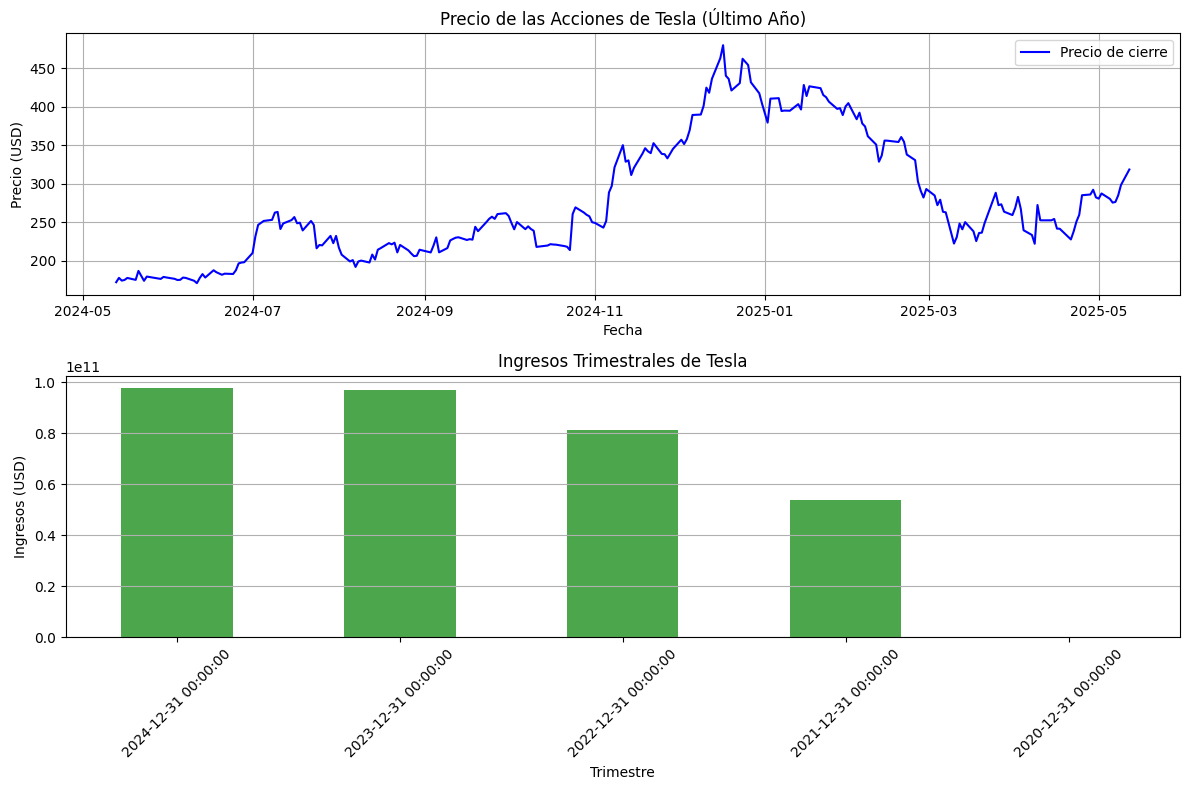

In [55]:
def crear_tablero():
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plt.plot(historial["Date"], historial["Close"], label="Precio de cierre", color="blue")
    plt.title("Precio de las Acciones de Tesla (Último Año)")
    plt.xlabel("Fecha")
    plt.ylabel("Precio (USD)")
    plt.legend()
    plt.grid()

    plt.subplot(2, 1, 2)
    ingresos.plot(kind="bar", color="green", alpha=0.7)
    plt.title("Ingresos Trimestrales de Tesla")
    plt.xlabel("Trimestre")
    plt.ylabel("Ingresos (USD)")
    plt.xticks(rotation=45)
    plt.grid(axis="y")

    plt.tight_layout()
    plt.show()

crear_tablero()

In [57]:
gme = yf.Ticker("GME")
historial = gme.history(period="1y")  
historial.reset_index(inplace=True)
finanzas = gme.financials
ingresos = finanzas.loc["Total Revenue"]

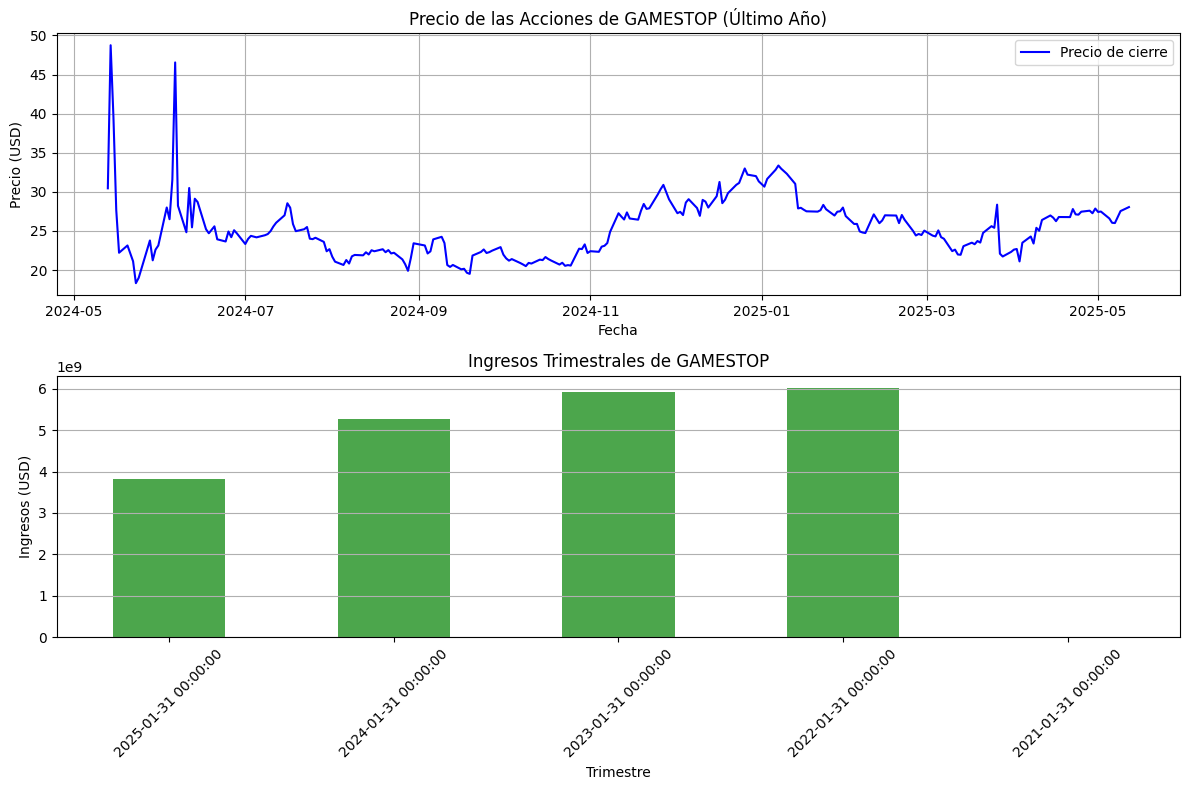

In [58]:
def crear_tablero():
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plt.plot(historial["Date"], historial["Close"], label="Precio de cierre", color="blue")
    plt.title("Precio de las Acciones de GAMESTOP (Último Año)")
    plt.xlabel("Fecha")
    plt.ylabel("Precio (USD)")
    plt.legend()
    plt.grid()

    plt.subplot(2, 1, 2)
    ingresos.plot(kind="bar", color="green", alpha=0.7)
    plt.title("Ingresos Trimestrales de GAMESTOP")
    plt.xlabel("Trimestre")
    plt.ylabel("Ingresos (USD)")
    plt.xticks(rotation=45)
    plt.grid(axis="y")

    plt.tight_layout()
    plt.show()

crear_tablero()